# **Web Scraping et analyse des meilleures ventes sur Amazon**

---

##  **Utilisation de la POO**

Après avoir obtenu nos bases par webscrapping, on va nettoyer et analyser la base en utilisant la programmation orientée objet. On a donc déjà ici les Tables 1 à 9 qu'on a obtenu via l'autre code.

---

In [10]:
pip install requests beautifulsoup4 pandas plotly


In [11]:
pip install -U kaleido


In [147]:
# Bibliothèques

import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.naive_bayes import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import statsmodels.formula.api as smf

import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from IPython.display import display, Markdown
import kaleido
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV

---

### ***Traitement de notre base de données Best Sellers***

On va traiter les données pour les analyser graphiquement préalablement à une étude plus approfondie

On va construire une classe pour nettoyer n'importe quelle base de données obtenue via webscrapping : enlever les doublons, les valeurs manquantes, convertir numériquement les colonnes str, ...

In [86]:
class DataCleaner:

    def __init__(self, df): # Les éléments sont des database
        self.df = df

    def get_data(self): # Pour obtenir la data
        return self.df


    def stat_data(self):
        return self.df.describe(include='all')   # Obtenir stat descriptive de la data


    def convert_rating(self):    # Convertir le nombre d'étoiles en numérique
        def convert_ratin(rating_str):
          try:
            return float(rating_str.split()[0].replace(',', '.'))
          except:
            return None

        return self.df.apply(convert_ratin)


    def clean_data(self):

        # Supprimer les valeurs manquantes

        self.df.dropna(inplace=True)

        # Supprimer les doublons

        self.df.drop_duplicates(subset = ['Nom'], inplace=True) # Seulement le nom différencie les articles


        return self.df


    def nettoyer_prix(self, prix): # On veut un prix numérique
        try:
            prix = str(prix).strip()

            # Si format français : 16,22 €

            if "€" in prix:
                prix = prix.replace("€", "").replace(" ", "").replace(",", ".")
                return float(prix)

            # Si format américain : $1,099.93

            elif "$" in prix:
                prix = prix.replace("$", "").replace(",", "")
                return float(prix)

            # Sinon on tente une conversion brute

            return float(prix)
        except:
            return None

    def appliquer_nettoyage_prix(self):
        self.df["Prix"] = self.df["Prix"].apply(self.nettoyer_prix)
        return self.df


    def convert_rating(self, rating_str): # On transforme les ratings en numérique
        try:
            return float(rating_str.split()[0].replace(',', '.'))
        except:
            return None

    def appliquer_convert_rating(self):
        self.df["Étoiles"] = self.df["Étoiles"].apply(self.convert_rating)
        return self.df

    def extraire_nombre_avis_brut(self, avis_text): # On nettoie le nombre d'avis
        try:
            # Supprimer les caractères spéciaux, espaces insécables
            avis_text = avis_text.replace("\xa0", "").replace("\u202f", "")
            # Trouver le dernier nombre dans la chaîne (le vrai nombre d'avis)
            match = re.findall(r"\d+", avis_text)
            if match:
                return int(match[-1])  # Dernier nombre = nombre d'avis
            else:
                return None
        except:
            return None

    def appliquer_nettoyage_avis(self):
        self.df["Nombre d'Avis"] = self.df["Nombre d'Avis"].apply(self.extraire_nombre_avis_brut)
        return self.df


    def nettoyer_carte_graphique(self):
        # RAM graphique (en Go)

        self.df["Taille RAM (Go)"] = self.df["Taille de la RAM graphique"].astype(str).str.extract(r'(\d+)', expand=False)
        self.df["Taille RAM (Go)"] = pd.to_numeric(self.df["Taille RAM (Go)"], errors="coerce")

        # Horloge GPU (MHz)

        self.df["Horloge GPU (MHz)"] = self.df["Vitesse d'horloge du GPU"].astype(str).str.extract(r'(\d+)', expand=False)
        self.df["Horloge GPU (MHz)"] = pd.to_numeric(self.df["Horloge GPU (MHz)"], errors="coerce")

        # Prix

        self.df["Prix"] = self.df["Prix"].astype(str).str.extract(r'(\d+)', expand=False)
        self.df["Prix"] = pd.to_numeric(self.df["Prix"], errors="coerce")

        return self.df


On peut maintenant appliquer les fontions de notre classe à notre Table_4 des Best Sellers pour obtenir la Table_5 nettoyée :

In [87]:
df = pd.read_csv('Table_4.csv')
df.rename(columns={"Évaluation (étoiles)": "Étoiles"}, inplace=True)

# Instanciation de la classe DataCleaner avec la table Table_4

cleaner = DataCleaner(df)

# Application des fonctions de nettoyage

Table_4_cleaned = cleaner.clean_data()
Table_4_cleaned = cleaner.appliquer_nettoyage_prix()
Table_4_cleaned = cleaner.appliquer_convert_rating()
Table_4_cleaned = cleaner.appliquer_nettoyage_avis()

# Affichage de la table nettoyée

Table_5 = cleaner.get_data()
#df.to_csv('Table_5.csv', index=False)

On va nettoyer également la base de données Table_6 des cartes graphiques pour obtenir la base nettoyée Table_7

In [88]:
df = pd.read_csv('Table_6.csv')
df.rename(columns={"Prix (€)": "Prix"}, inplace=True)

cleaner = DataCleaner(df)

# Application des fonctions de nettoyage

Table_6_cleaned = cleaner.clean_data()
Table_6_cleaned = cleaner.appliquer_nettoyage_prix()
Table_6_cleaned = cleaner.appliquer_convert_rating()
Table_6_cleaned = cleaner.appliquer_nettoyage_avis()

# Affichage de la table nettoyée

Table_7 = cleaner.get_data()
#df.to_csv('Table_7.csv', index=False)

Et on va nettoyer la base de fiches techniques des cartes graphiques Table_8 pour avoir la table finale Table_9 :

In [90]:
df = pd.read_csv('Table_8.csv')
df.rename(columns={"Prix (€)": "Prix"}, inplace=True)
df.rename(columns={"Étoiles": "Etoiles"}, inplace=True)

cleaner = DataCleaner(df)

# Application des fonctions de nettoyage

Table_9_cleaned = cleaner.clean_data()
Table_9_cleaned = cleaner.appliquer_nettoyage_prix()
Table_9_cleaned = cleaner.appliquer_nettoyage_avis()
Table_9_cleaned = cleaner.nettoyer_carte_graphique()

# Affichage de la table nettoyée

Table_9 = cleaner.get_data()
#df.to_csv('Table_9.csv', index=False)

### ***Analyse graphique des données***

On va construire maintenant une classe permettant de tracer les données intéressantes à partir de n'importe quelle base de données nettoyée.

In [105]:
class GraphPlotter:

    def __init__(self, df):
        self.df = df


    def nettoyer(self) : # Si notre base df n'est pas déjà nettoyée

      self.df["Prix"] = self.df["Prix"].astype(str).str.replace(",", ".", regex=False)
      self.df["Prix"] = pd.to_numeric(self.df["Prix"], errors="coerce")
      self.df["Étoiles"] = pd.to_numeric(self.df["Etoiles"], errors="coerce")
      self.df["Nombre d'Avis"] = pd.to_numeric(self.df["Nombre d'Avis"], errors="coerce")


    def nettoyer_carte_graphique(self):
        # RAM graphique (en Go)

        self.df["Taille RAM (Go)"] = self.df["Taille de la RAM graphique"].astype(str).str.extract(r'(\d+)', expand=False)
        self.df["Taille RAM (Go)"] = pd.to_numeric(self.df["Taille RAM (Go)"], errors="coerce")

        # Horloge GPU (MHz)

        self.df["Horloge GPU (MHz)"] = self.df["Vitesse d'horloge du GPU"].astype(str).str.extract(r'(\d+)', expand=False)
        self.df["Horloge GPU (MHz)"] = pd.to_numeric(self.df["Horloge GPU (MHz)"], errors="coerce")

        # Prix

        self.df["Prix"] = self.df["Prix"].astype(str).str.extract(r'(\d+)', expand=False)
        self.df["Prix"] = pd.to_numeric(self.df["Prix"], errors="coerce")

        return self.df

# Graphes de base

    def plot_price_distribution(self): # Distribution des prix

        fig = px.histogram(self.df, x="Prix", title="Distribution des prix")
        fig.show()

    def plot_rating_distribution(self): # Distribution des évaluations

        fig = px.histogram(self.df, x="Etoiles", title="Distribution des évaluations")
        fig.show()

    def plot_reviews_distribution(self): # Distribution des reviews

        fig = px.histogram(self.df, x="Nombre d'Avis", title="Distribution du nombre d'avis")
        fig.show()

    def plot_price_vs_rating(self): # Prix selon étoiles

        fig = px.scatter(self.df, x="Etoiles", y="Prix", title="Prix en fonction de l'évaluation")
        fig.show()

    def plot_price_vs_reviews(self): # Prix selon reviews

        fig = px.scatter(self.df, x="Nombre d'Avis", y="Prix", title="Prix en fonction du nombre d'avis")
        fig.show()

    def plot_price_vs_category(self): # Prix selon catégorie

        fig = px.box(self.df, x="Catégorie", y="Prix", title="Prix en fonction de la catégorie")
        fig.show()

    def plot_reviews_vs_category(self): # Avis selon catégorie

        fig = px.box(self.df, x="Catégorie", y="Nombre d'Avis", title="Nombre d'avis en fonction de la catégorie")
        fig.show()

    def plot_rating_vs_category(self): # Étoiles selon catégorie

        fig = px.box(self.df, x="Catégorie", y="Etoiles", title="Étoiles en fonction de la catégorie")
        fig.show()


# Graphes plus sophistiqués

    def plot_price_distribution_with_kde_and_mean(self): #Avec KDE et moyenne

        # Filtrage : prix < 1000 €

        prix_filtrés = self.df["Prix"].dropna()
        prix_filtrés = prix_filtrés[prix_filtrés < 1000]

        # Calcul de la moyenne

        moyenne = prix_filtrés.mean()

        # Histogramme

        hist = go.Histogram(
            x=prix_filtrés,
            nbinsx=300,
            name="Histogramme",
            marker_color='lightblue',
            opacity=0.6
        )

        # KDE

        kde = gaussian_kde(prix_filtrés)
        x_vals = np.linspace(prix_filtrés.min(), prix_filtrés.max(), 300)
        bin_width = (prix_filtrés.max() - prix_filtrés.min()) / 40
        kde_scaled = kde(x_vals) * len(prix_filtrés) * bin_width

        kde_line = go.Scatter(
            x=x_vals,
            y=kde_scaled,
            mode='lines',
            name='Courbe KDE',
            line=dict(color='red', width=2)
        )

        # Trait vertical pour la moyenne

        mean_line = go.Scatter(
            x=[moyenne, moyenne],
            y=[0, max(kde_scaled) * 1.05],
            mode="lines",
            name=f"Moyenne ({moyenne:.2f} €)",
            line=dict(color="green", dash="dash", width=2)
        )

        # Figure finale

        fig = go.Figure(data=[hist, kde_line, mean_line])
        fig.update_layout(
            title="Distribution des prix",
            xaxis_title="Prix (€)",
            yaxis_title="Nombre de produits",
            barmode='overlay',
            template="plotly_white"
        )

        fig.show()


    def plot_rating_distribution_with_kde(self): # Evaluations avec KDE

        etoiles_data = self.df["Etoiles"].dropna()

        # Histogramme pour info d’échelle

        hist_vals, bin_edges = np.histogram(etoiles_data, bins=130)
        bin_width = bin_edges[1] - bin_edges[0]

        # Calcul KDE

        kde = gaussian_kde(etoiles_data)
        x_vals = np.linspace(etoiles_data.min(), etoiles_data.max(), 130)
        kde_vals = kde(x_vals)

        # Mise à l’échelle de la courbe KDE

        kde_scaled = kde_vals * len(etoiles_data) * bin_width

        # Histogramme interactif

        hist = go.Histogram(
            x=etoiles_data,
            nbinsx=130,
            name="Histogramme",
            opacity=0.6,
            marker_color='darkgreen'
        )

        # Courbe KDE

        kde_line = go.Scatter(
            x=x_vals,
            y=kde_scaled,
            mode='lines',
            name='Courbe KDE',
            line=dict(color='darkred', width=2)
        )

        # Figure finale

        fig = go.Figure(data=[hist, kde_line])
        fig.update_layout(
            title="Distribution des évaluations",
            xaxis_title="Etoiles",
            yaxis_title="Nombre de produits",
            barmode='overlay'
        )

        fig.show()


    def plot_reviews_vs_price(self): # Avis selon prix

        self.df["Nombre d'Avis"] = pd.to_numeric(self.df["Nombre d'Avis"], errors="coerce")

        # Supprimer les lignes avec des valeurs manquantes

        df_to_plot = self.df.dropna(subset=["Prix", "Etoiles", "Nombre d'Avis"])


        fig = px.scatter(
            df_to_plot,
            x="Nombre d'Avis",
            y="Prix",
            color="Etoiles",
            size="Etoiles",
            title=" Nombre d'avis vs Prix"
        )
        fig.update_layout(xaxis_title="Nombre d'Avis", yaxis_title="Prix (€)")

        fig.show()


    def plot_correlation_matrix(self): # Matrice de corrélation

        # Sélection + suppression des NaN

        df_corr = self.df[["Prix", "Etoiles", "Nombre d'Avis"]].dropna()

        # Matrice de corrélation

        corr_matrix = df_corr.corr()

        # Plotly heatmap

        fig = go.Figure(
            data=go.Heatmap(
                z=corr_matrix.values,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                colorscale='Picnic',
                zmin=-1,
                zmax=1,
                colorbar=dict(title="Corrélation")
            )
        )

        fig.update_layout(
            title="Corrélation entre les variables",
            xaxis=dict(title="", tickangle=-45),
            yaxis=dict(title=""),
            template="plotly_white"
        )
        fig.show()



    def plot_price_vs_category(self): # Prix selon catégorie


        df_filtré = self.df[self.df["Catégorie"].str.lower() != "carte graphique"]

        # Trier les catégories par prix médian

        medians = df_filtré.groupby("Catégorie")["Prix"].median().sort_values()
        categorie_ordonnees = medians.index.tolist()

        # Créer le boxplot

        fig = px.box(
            df_filtré,
            x="Catégorie",
            y="Prix",
            points="all",
            color="Catégorie",
            title="Prix des produits par catégorie"
        )

        # Ajouter la ligne de moyenne

        moyenne = df_filtré["Prix"].mean()
        fig.add_shape(
            type="line",
            x0=-0.5,
            x1=8,  # Adaptez cette valeur si nécessaire en fonction du nombre de catégories
            y0=moyenne,
            y1=moyenne,
            line=dict(color="red", width=2, dash="dash"),
            xref="x", yref="y"
        )

        # Ajouter une annotation pour la moyenne

        fig.add_annotation(
            x=len(categorie_ordonnees),
            y=moyenne,
            text=f"Moyenne : {moyenne:.2f} €",
            showarrow=False,
            font=dict(color="red"),
            yshift=10
        )

        # Layout final

        fig.update_layout(
            xaxis_title="Catégorie",
            yaxis_title="Prix (€)",
            template="plotly_white",
            xaxis_tickangle=45
        )
        fig.show()


# Graphes plus spécifiques aux cartes graphiques


    def plot_brand_counts(self, brand_col='Marque'): # Fréquence des marques
        brand_counts = self.df[brand_col].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=brand_counts.index, y=brand_counts.values)
        plt.title('Nombre de cartes graphiques par marque')
        plt.xlabel('Marque')
        plt.ylabel('Nombre')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


    def plot_gpu_ram_heatmap(self): # Marque GPU en fonction de RAM
        plt.subplots(figsize=(8, 8))
        df_2dhist = pd.DataFrame({
            x_label: grp['Type de RAM graphique'].value_counts()
            for x_label, grp in self.df.groupby('Fabricant de processeurs graphiques')
        })
        sns.heatmap(df_2dhist, cmap='viridis')
        plt.xlabel('Fabricant de processeurs graphiques')
        plt.ylabel('Type de RAM graphique')
        plt.show()



    def plot_gpu_price_violin(self): # Prix par fabricant
        figsize = (12, 1.2 * len(self.df['Fabricant de processeurs graphiques'].unique()))
        plt.figure(figsize=figsize)
        sns.violinplot(self.df, x='Prix', y='Fabricant de processeurs graphiques', inner='stick', palette='Dark2')
        sns.despine(top=True, right=True, bottom=True, left=True)
        plt.show()

    def plot_ram_type_price_violin(self): # Prix par type de RAM
        figsize = (12, 1.2 * len(self.df['Type de RAM graphique'].unique()))
        plt.figure(figsize=figsize)
        sns.violinplot(self.df, x='Prix', y='Type de RAM graphique', inner='stick', palette='Dark2')
        sns.despine(top=True, right=True, bottom=True, left=True)
        plt.show()

    def plot_ram_type_counts(self): # Fréquence RAM
        self.df.groupby('Type de RAM graphique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
        plt.gca().spines[['top', 'right',]].set_visible(False)
        plt.title('Nombre de cartes graphiques par type de RAM')
        plt.xlabel('Nombre')
        plt.ylabel('Type de RAM graphique')
        plt.show()

    def plot_gpu_manufacturer_counts(self): # Fréquence fabriquant gpu
        self.df.groupby('Fabricant de processeurs graphiques').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
        plt.gca().spines[['top', 'right']].set_visible(False)
        plt.title('Nombre de cartes graphiques par fabricant de processeurs graphiques')
        plt.xlabel('Nombre')
        plt.ylabel('Fabricant de processeurs graphiques')
        plt.show()

    def plot_price_vs_ram(self): # prix selon RAM
        fig = px.scatter(self.df, x="Taille RAM (Go)", y="Prix",
                         color="Étoiles", size="Nombre d'Avis",
                         title="Prix en fonction de la RAM graphique",
                         labels={"Prix": "Prix (€)", "Taille RAM (Go)": "RAM (Go)"})

        fig.update_layout(
            xaxis=dict(
                tickmode='array',
                tickvals=[2, 4, 6, 8, 16],
                range=[1, 18],
                title="RAM (Go)"
            )
        )
        fig.show()

    def plot_price_vs_gpu_frequency(self): # prix selon gpu
        fig = px.scatter(self.df, x="Horloge GPU (MHz)", y="Prix",
                         color="Taille RAM (Go)", size="Nombre d'Avis",
                         title="Prix vs Fréquence GPU",
                         labels={"Prix": "Prix (€)", "Horloge GPU (MHz)": "Fréquence GPU (MHz)"})
        fig.show()


    def plot_price_by_brand_box(self): # prix selon marque
        fig = px.box(
            self.df,
            x="Marque",
            y="Prix",
            points="all",
            title="Prix des cartes graphiques par marque",
            labels={"Prix": "Prix (€)", "Marque": "Marque"},
            color="Marque"
        )

        fig.update_layout(
            xaxis_title="Marque",
            yaxis_title="Prix (€)",
            template="plotly_white",
            xaxis_tickangle=45
        )

        fig.show()


On va crée une instance de la classe pour afficher les graphes de notre database nettoyée de Best Seller :

In [ ]:
df = pd.read_csv('Table_5.csv')
df.rename(columns={"Évaluation (étoiles)": "Étoiles"}, inplace=True)

# Créer une instance de la classe

plotter = GraphPlotter(df)

# Appeler les fonctions pour tracer les graphiques

plotter.nettoyer()
plotter.plot_price_distribution()
plotter.plot_rating_distribution()
plotter.plot_price_vs_rating()
plotter.plot_price_vs_category()
plotter.plot_reviews_vs_category()
plotter.plot_rating_vs_category()
plotter.plot_price_distribution_with_kde_and_mean()
plotter.plot_rating_distribution_with_kde()
plotter.plot_reviews_vs_price()
plotter.plot_correlation_matrix()
plotter.plot_price_vs_category()

Et on peut faire de même avec notre Database de Cartes Graphiques :

In [ ]:
df = pd.read_csv('Table_7.csv')
df.rename(columns={"Prix (€)": "Prix"}, inplace=True)
df.rename(columns={"Étoiles": "Etoiles"}, inplace=True)

# Créer une instance de la classe

plotter = GraphPlotter(df)

# Appeler les fonctions pour tracer les graphiques

plotter.nettoyer()
plotter.plot_price_distribution()
plotter.plot_rating_distribution()
plotter.plot_reviews_distribution()
plotter.plot_price_vs_rating()
plotter.plot_price_vs_reviews()
plotter.plot_price_distribution_with_kde_and_mean()
plotter.plot_rating_distribution_with_kde()
plotter.plot_reviews_vs_price()
plotter.plot_correlation_matrix()

Enfin, on va faire une instance de classe pour notre table finale Table_9 pour pouvoir tracer les graphes des caractéristiques plus techniques de nos cartes graphiques :

In [ ]:
df = pd.read_csv('Table_9.csv')
df.rename(columns={"Prix (€)": "Prix"}, inplace=True)
df.rename(columns={"Étoiles": "Etoiles"}, inplace=True)

# Créer une instance de la classe

plotter = GraphPlotter(df)

# Appeler les fonctions pour tracer les graphiques

plotter.nettoyer()
plotter.nettoyer_carte_graphique()
plotter.plot_brand_counts()
plotter.plot_gpu_ram_heatmap()
plotter.plot_gpu_price_violin()
plotter.plot_ram_type_price_violin()
plotter.plot_ram_type_counts()
plotter.plot_gpu_manufacturer_counts()
plotter.plot_price_vs_ram()
plotter.plot_price_vs_gpu_frequency()
plotter.plot_price_by_brand_box()

---

### ***Modèles de machine learning***

On va construire une classe permettant de manipuler des modèles de machine learning facilement :


In [152]:
class MachineLearningModel:



    def __init__(self, df, target_col, features):
        self.df = df
        self.target_col = target_col
        self.features = features
        self.X = df[features]
        self.y = df[target_col]
        self.preprocess_data()
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.3, random_state=42
        )


    def preprocess_data(self): # Encodage des labels et standardisation

        # Encodage des labels pour les variables catégoriques

        le = LabelEncoder()
        categorical_features = ['Marque', 'Fabricant de processeurs graphiques', 'Type de RAM graphique']
        for feature in categorical_features:
            if feature in self.features:
                self.X[feature] = le.fit_transform(self.X[feature])

        # Standardization

        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(self.X)


    def calculate_bic_aic(self, model, X, y): # Calcul AIC BIC
        n = len(y)
        k = model.coef_.size + 1
        log_likelihood = model.score(X, y)
        bic = -2 * log_likelihood + k * np.log(n)
        aic = -2 * log_likelihood + 2 * k
        return bic, aic



    def logistic_regression(self):

        model = LogisticRegression()
        model.fit(self.X_train, self.y_train)
        return model

    def knn(self, n_neighbors=5):

        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        model.fit(self.X_train, self.y_train)
        return model

    def evaluate_model(self, model, y_pred): # On évalue nos modèles suivants plusieurs métriques

        # Coefficients

        if isinstance(model, LogisticRegression):
            coefficients = model.coef_
            intercept = model.intercept_
            print(f"Coefficients: {coefficients}")
            print(f"Intercept: {intercept}")
            bic_train, aic_train = self.calculate_bic_aic(model, self.X_train, self.y_train)
            bic_test, aic_test = self.calculate_bic_aic(model, self.X_test, self.y_test)
            print('BIC (entraînement):', bic_train)
            print('AIC (entraînement):', aic_train)
            print('BIC (test):', bic_test)
            print('AIC (test):', aic_test)

        # Calcule metrics

        accuracy = accuracy_score(self.y_test, y_pred)
        r_squared = r2_score(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        rmse = np.sqrt(mse)
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        logloss = log_loss(self.y_test, y_pred)
        R = model.score(self.X_test, self.y_test)  # R-squared

        # resultats

        print("Model:", model.__class__.__name__)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print(f"R-squared: {R:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print('ROC:', roc_auc_score(self.y_test, y_pred))

        # matrice de confusion

        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Prédite: Bestseller', 'Prédite: Pas Bestseller'],
                    yticklabels=['Réel: Bestseller', 'Réel: Pas Bestseller'])
        plt.title("Matrice de Confusion")
        plt.xlabel("Prédiction")
        plt.ylabel("Réel")
        plt.show()

    def stepwise_regression(self, k_features=4, scoring='accuracy'): # Regression pas par pas
        model = LogisticRegression(max_iter=50000)
        sfs = SequentialFeatureSelector(model,
                                        k_features=k_features,
                                        forward=True,
                                        scoring=scoring,
                                        cv=None)
        selected_features = sfs.fit(self.X, self.y)

        print("Selected Features:", selected_features.k_feature_names_)

    def hyperparameter_tuning(self, model, param_grid): # optimisation hyperparametre cross validation
        grid_search = GridSearchCV(model, param_grid, verbose=True, n_jobs=-1, cv=10)
        grid_search.fit(self.X_train, self.y_train)  # Fit to training data

        print("Best Hyperparameters:", grid_search.best_params_)
        return grid_search.best_estimator_  # Return the best model

    def optimize_knn(self, k_range=range(1, 17)): # optimise le nombre de voisins
        accuracies = []
        losses = []
        rocs = []

        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(self.X_train, self.y_train)
            y_pred = knn.predict(self.X_test)

            accuracy = accuracy_score(self.y_test, y_pred)
            loss = log_loss(self.y_test, y_pred)
            roc = roc_auc_score(self.y_test, y_pred)

            accuracies.append(accuracy)
            losses.append(loss)
            rocs.append(roc)

        best_k = k_range[accuracies.index(max(accuracies))]

        # Print
        print("Meilleur k:", best_k)
        print("Précision correspondante:", max(accuracies))

        results = pd.DataFrame({
            'k': k_range,
            'Précision': accuracies,
            'Logloss': losses,
            'ROC': rocs
        })
        print(results)

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, accuracies, marker='o')
        plt.xlabel('Valeur de k')
        plt.ylabel('Précision')
        plt.title('Précision en fonction de k')
        plt.show()

        return best_k


On va maintenant appeler des instances de cette classe pour étudier les modèles :

<ipython-input-152-bcdfc9cf2bda>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-bcdfc9cf2bda>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-bcdfc9cf2bda>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-

Coefficients: [[ 0.258753   -0.00338023 -0.00085129 -0.80355964  0.03637446 -0.35333097
   0.26238506 -0.71689865]]
Intercept: [-2.63101619]
BIC (entraînement): 32.05770670526435
AIC (entraînement): 16.0
BIC (test): 25.161590461985917
AIC (test): 16.2
Model: LogisticRegression
Accuracy: 90.00%
R-squared: 0.9000
MSE: 0.1000
RMSE: 0.3162
ROC: 0.9230769230769231


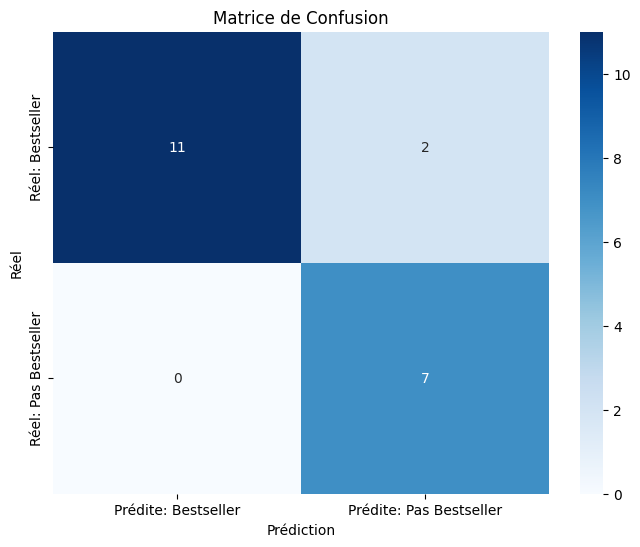

Model: KNeighborsClassifier
Accuracy: 85.00%
R-squared: 0.8500
MSE: 0.1500
RMSE: 0.3873
ROC: 0.7857142857142857


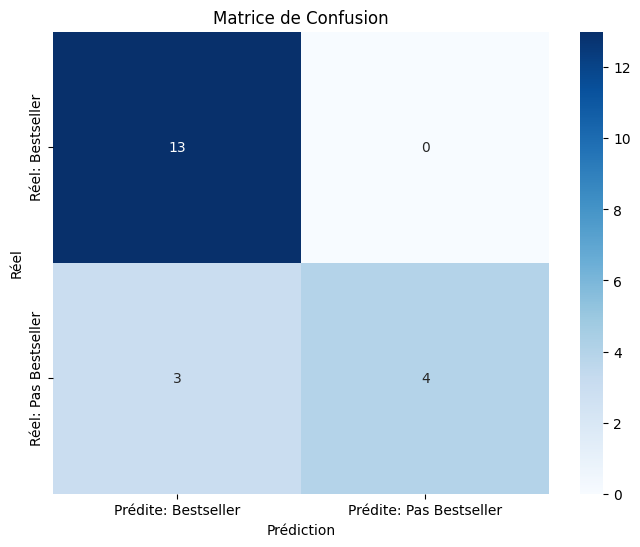

In [153]:
df = pd.read_csv('Table_10.csv')
target_column = 'Bestseller'
features = ['Taille RAM (Go)', 'Horloge GPU (MHz)', 'Prix', 'Étoiles', 'Nombre d\'Avis',
            'Marque', 'Fabricant de processeurs graphiques', 'Type de RAM graphique' ]


# Instanciation

model_instance = MachineLearningModel(df, target_column, features)

model_instance.preprocess_data()

# reg logistique

logistic_model = model_instance.logistic_regression()

# prediction reg logistique

y_pred_logistic = logistic_model.predict(model_instance.X_test)

# evaluation reg logistique

model_instance.evaluate_model(logistic_model, y_pred_logistic)

# KNN

knn_model = model_instance.knn(n_neighbors=5)

# pred KNN

y_pred_knn = knn_model.predict(model_instance.X_test)

# evaluation KNN

model_instance.evaluate_model(knn_model, y_pred_knn)

On peut optimiser les variables et les hyperparamètres avec nos fonctions de classes et tester une nouvelle instanciation pour avoir un modèle optimisé :

In [154]:
df = pd.read_csv('Table_10.csv')
target_column = 'Bestseller'
features = ['Taille RAM (Go)', 'Horloge GPU (MHz)', 'Prix', 'Étoiles', 'Nombre d\'Avis',
            'Marque', 'Fabricant de processeurs graphiques', 'Type de RAM graphique' ]


# Instanciation

model_instance = MachineLearningModel(df, target_column, features)

model_instance.preprocess_data()

# Stepwise regression pour optimiser quelques métriques et obtenir les meilleures variables

model_instance.stepwise_regression(k_features=4, scoring='accuracy')
model_instance.stepwise_regression(k_features=4, scoring='neg_log_loss')
model_instance.stepwise_regression(k_features=4, scoring='roc_auc')

# Cross validation pour optimiser les hyperparamètres et choisir une pénalité

param_grid = [
    {'penalty':['l1','l2','elasticnet','None'],
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'C' : [0.001,0.01,0.05,0.1,0.5,1.0,10.0,100.0],
    'max_iter'  : [100,1000,2500,5000, 20000]
}
]

model_instance_opt = MachineLearningModel(df, target_column, Selected_Features)

model_instance_opt.preprocess_data()

logistic_model = model_instance_opt.logistic_regression()

best_model = model_instance_opt.hyperparameter_tuning(logistic_model, param_grid)

<ipython-input-152-bcdfc9cf2bda>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-bcdfc9cf2bda>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-bcdfc9cf2bda>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-152-

Selected Features: ('Taille RAM (Go)', 'Horloge GPU (MHz)', 'Prix', "Nombre d'Avis")
Selected Features: ('Horloge GPU (MHz)', 'Prix', 'Étoiles', "Nombre d'Avis")
Selected Features: ('Taille RAM (Go)', 'Horloge GPU (MHz)', 'Prix', "Nombre d'Avis")
Fitting 10 folds for each of 800 candidates, totalling 8000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 9 members, which is less than n_splits=10.



Best Hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


5200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_

On peut instancier un modèle de régression logistique avec les meilleures variables et un avec une pénalité en plus et afficher les résultats :

Coefficients: [[ 0.00156037 -0.00482054  0.00104512  0.10835412]]
Intercept: [-31.29822136]
BIC (entraînement): 16.920948169591306
AIC (entraînement): 8.0
BIC (test): 13.178661367769953
AIC (test): 8.2
Model: LogisticRegression
Accuracy: 90.00%
R-squared: 0.9000
MSE: 0.1000
RMSE: 0.3162
ROC: 0.9230769230769231


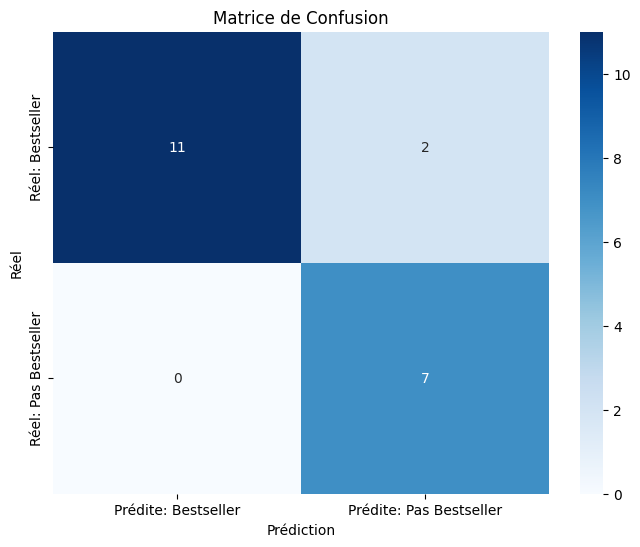

In [146]:
Selected_Features = ['Taille RAM (Go)', 'Horloge GPU (MHz)', 'Prix', "Nombre d'Avis"]
df = pd.read_csv('Table_10.csv')
target_column = 'Bestseller'

# Instanciation

model_instance = MachineLearningModel(df, target_column, Selected_Features)

model_instance.preprocess_data()

# reg logistique

logistic_model = model_instance.logistic_regression()

# prediction reg logistique

y_pred_logistic = logistic_model.predict(model_instance.X_test)

# evaluation reg logistique

model_instance.evaluate_model(logistic_model, y_pred_logistic)




Enfin , on peut optimiser l'hyperparamètre du modèle KNN :

Meilleur k: 3
Précision correspondante: 0.95
     k  Précision    Logloss       ROC
0    1       0.90   3.604365  0.923077
1    2       0.90   3.604365  0.857143
2    3       0.95   1.802183  0.928571
3    4       0.85   5.406548  0.785714
4    5       0.85   5.406548  0.785714
5    6       0.85   5.406548  0.785714
6    7       0.85   5.406548  0.785714
7    8       0.85   5.406548  0.785714
8    9       0.85   5.406548  0.785714
9   10       0.85   5.406548  0.785714
10  11       0.85   5.406548  0.785714
11  12       0.75   9.010913  0.642857
12  13       0.75   9.010913  0.642857
13  14       0.75   9.010913  0.642857
14  15       0.75   9.010913  0.642857
15  16       0.70  10.813096  0.571429


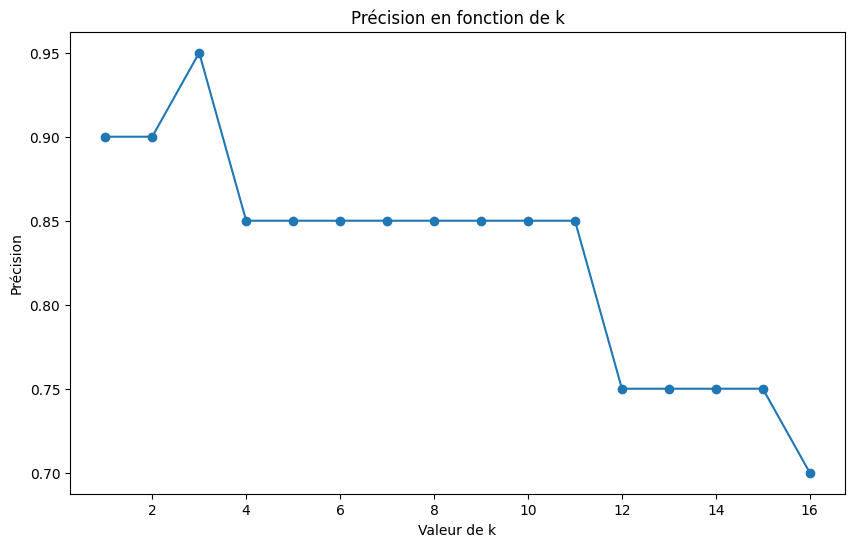

Model: KNeighborsClassifier
Accuracy: 85.00%
R-squared: 0.9500
MSE: 0.1500
RMSE: 0.3873
ROC: 0.7857142857142857


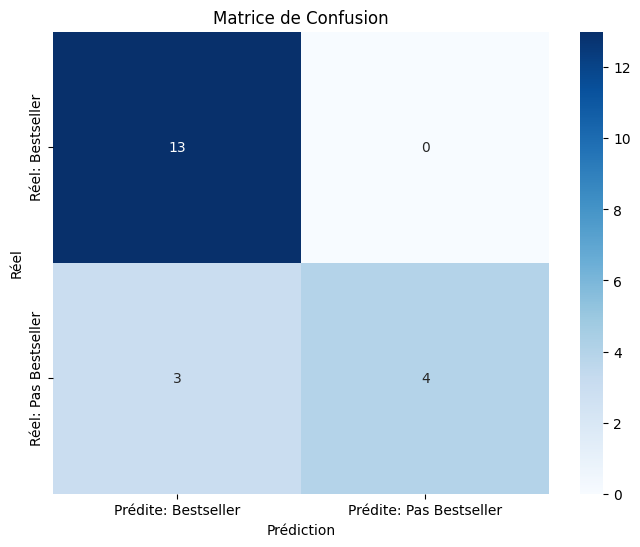

In [157]:
Selected_Features = ['Taille RAM (Go)', 'Horloge GPU (MHz)', 'Prix', "Nombre d'Avis"]
df = pd.read_csv('Table_10.csv')
target_column = 'Bestseller'

# Instanciation

model_instance = MachineLearningModel(df, target_column, Selected_Features)

model_instance.preprocess_data()

best_k = model_instance.optimize_knn()
knn_model = model_instance.knn(n_neighbors=best_k)

model_instance.evaluate_model(knn_model, y_pred_knn)

### ***Tests***

On va tester notre modèle en implémentant une classe d'objets Carte Graphique avec les propriétés d'importance que nous avons décelé, et en créant avec cette classe des cartes graphiques qui ne sont pas dans notre base, pour voir ce que le modèle prédit.

In [ ]:
class CarteGraphique:
    def __init__(self, prix, etoiles, coprocesseur_graphique, taille_ram, fabricant, type_ram, nombre_avis, marque, horloge_gpu):
        self.prix = prix
        self.etoiles = etoiles
        self.coprocesseur_graphique = coprocesseur_graphique
        self.taille_ram = taille_ram
        self.fabricant = fabricant
        self.type_ram = type_ram
        self.nombre_avis = nombre_avis
        self.marque = marque
        self.horloge_gpu = horloge_gpu

    def est_bestseller(self):
        # Créer un tableau NumPy avec les caractéristiques de la carte graphique
        caracteristiques = np.array([
            self.prix,
            self.taille_ram,
            self.nombre_avis,
            self.horloge_gpu
        ]).reshape(1, -1)  # Redimensionner pour la prédiction

        # Utiliser le modèle de régression logistique pour prédire
        prediction = best_model_lr.predict(caracteristiques)

        # Retourner True si la prédiction est 1 (bestseller), False sinon
        return prediction[0] == 1

On va créé quelques instances de Carte Graphique et voir ce que la fonction *est_bestseller* nous donne.

Commençons par une très bonne carte graphique qui devrait être un *bestseller*

In [ ]:
# Créer une instance de la classe CarteGraphique
carte_graphique = CarteGraphique(prix=700, etoiles=4.7, coprocesseur_graphique="NVIDIA GeForce RTX 3080", taille_ram=10, fabricant="NVIDIA", type_ram="GDDR6X", nombre_avis=1500, marque="NVIDIA", horloge_gpu=1.7)

# Afficher les propriétés de la carte graphique

print(f"Prix : {carte_graphique.prix}")
print(f"Taille RAM : {carte_graphique.taille_ram}")
print(f"Nombre d avis :" ,carte_graphique.nombre_avis)
print(f"Fabricant : {carte_graphique.fabricant}")
print(f"Type de RAM : {carte_graphique.type_ram}")


# Prédire si la carte graphique est un bestseller ou pas
est_bestseller = carte_graphique.est_bestseller()

# Afficher le résultat
print(f"La carte graphique devrait être un bestseller: {est_bestseller}")



Prix : 700
Taille RAM : 10
Nombre d avis : 1500
Fabricant : NVIDIA
Type de RAM : GDDR6X
La carte graphique devrait être un bestseller: True


Le modèle prédit bien que ce sera un *bestseller* .

On peut également tester nos fonctions avec des tests unitaires. Ici quelques tests que nous avons utilisé pour voir si le web scrapping et la modélisation fonctionnaient correctement

On va tester notre fonction *scraper_categorie* pour voir si on récupère bien le prix et le nom de l'article

In [ ]:
import unittest
import requests
from bs4 import BeautifulSoup

headers_list = [
    {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"},
    {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.74 Safari/537.36"},
    {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36"}
]

def scraper_categorie(nom_categorie, url):
    produits_scrapes = 0
    L = []

    while produits_scrapes < 30: # Limite de scraping
        print(f"Scraping de la catégorie {nom_categorie}...")

        # Rotation des User-Agent pour ne pas être bloqué
        headers = random.choice(headers_list)

        # Envoyer la requête HTTP
        response = requests.get(url, headers=headers)

        # Vérifier si la requête est bloquée
        if response.status_code != 200:
            print(f"⚠️ Accès bloqué pour {nom_categorie}. Code: {response.status_code}")
            break

        soup = BeautifulSoup(response.text, "html.parser")

        # Trouver les produits
        items = soup.find_all("div", class_="p13n-sc-uncoverable-faceout")

        for item in items:
            if produits_scrapes >= 30:
                break  # Stop si on atteint 30 produits

            try:
                nom = item.find(class_=lambda value: value and "p13n-sc-css" in value).text.strip()
            except:
                nom = "Non Disponible"

            try:
                prix = item.find(class_=lambda value: value and "p13n-sc-price" in value).text.strip()
            except:
                prix = "Non Disponible"

            # Stocker les informations du produit
            L.append({
                "Catégorie": nom_categorie,
                "Nom du Produit": nom,
                "Prix": prix,
            })
            produits_scrapes += 1
    return L



class TestScraperCategorie(unittest.TestCase):
    def test_scraper_categorie(self):

        # Définir le nom et l'URL de la catégorie à scraper.

        nom_categorie = "electronics"
        url = "https://www.amazon.fr/gp/bestsellers/electronics"

        # Appeler la fonction scraper_categorie.

        data = scraper_categorie(nom_categorie, url)

        # Vérifier que le dictionnaire retourné n'est pas vide.

        self.assertTrue(len(data) > 0)

        # Vérifier que le dictionnaire contient les noms et les prix de certains articles.

        self.assertTrue('Apple AirTag' in data[3]["Nom du Produit"])
        self.assertTrue(data[3]["Prix"] is not None)


if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Scraping de la catégorie electronics...


F
FAIL: test_scraper_categorie (__main__.TestScraperCategorie.test_scraper_categorie)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-35-b225b7041676>", line 77, in test_scraper_categorie
    self.assertTrue('Apple AirTag' in data[3]["Nom du Produit"])
AssertionError: False is not true

----------------------------------------------------------------------
Ran 1 test in 0.869s

FAILED (failures=1)


La fonction fonctionne correctement.

On peut également tester un modèle :

In [ ]:
import unittest
import numpy as np
from sklearn.metrics import *


class TestModel(unittest.TestCase):
    def test_model_performance(self):

        # prédictions

        y_pred = self.best_model_lr.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)

        # threshold de précision

        accuracy_min = 50

        # Assert que la précision est supérieure à la limite

        self.assertLess(accuracy, accuracy_min, f"MSE ({accuracy}) is higher than the threshold ({accuracy_min})")



TestModel.best_model_lr = best_model_lr
TestModel.X_test = X_test
TestModel.y_test = y_test

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.

Scraping de la catégorie electronics...


F
FAIL: test_scraper_categorie (__main__.TestScraperCategorie.test_scraper_categorie)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-35-b225b7041676>", line 77, in test_scraper_categorie
    self.assertTrue('Apple AirTag' in data[3]["Nom du Produit"])
AssertionError: False is not true

----------------------------------------------------------------------
Ran 2 tests in 0.941s

FAILED (failures=1)


La modélisation fonctionne également correctement.